In [403]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [404]:
import dask.dataframe as dd
from distributed import Client, LocalCluster
from dask.distributed import Client
client = Client()  # start distributed scheduler locally.
client

/home/ubuntu/.local/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34535 instead
  warnings.warn(
distributed.scheduler INFO  State start
distributed.scheduler INFO    Scheduler at:     tcp://127.0.0.1:42611
distributed.scheduler INFO    dashboard at:           127.0.0.1:34535
distributed.nanny INFO          Start Nanny at: 'tcp://127.0.0.1:46319'
distributed.nanny INFO          Start Nanny at: 'tcp://127.0.0.1:40781'
distributed.nanny INFO          Start Nanny at: 'tcp://127.0.0.1:46845'
distributed.nanny INFO          Start Nanny at: 'tcp://127.0.0.1:36183'
distributed.nanny INFO          Start Nanny at: 'tcp://127.0.0.1:43025'
distributed.nanny INFO          Start Nanny at: 'tcp://127.0.0.1:46433'
distributed.nanny INFO          Start Nanny at: 'tcp://127.0.0.1:40319'
distributed.nanny INFO          Start Nanny at: 'tcp://127.0.0.1:33733'
distributed.scheduler

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:34535/status,
Dashboard: http://127.0.0.1:34535/status,Workers: 8
Total threads: 32,Total memory: 61.55 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42611,Workers: 8
Dashboard: http://127.0.0.1:34535/status,Total threads: 32
Started: Just now,Total memory: 61.55 GiB
Comm: tcp://127.0.0.1:38747,Total threads: 4
Dashboard: http://127.0.0.1:44079/status,Memory: 7.69 GiB
Nanny: tcp://127.0.0.1:46433,


In [405]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [406]:
start='2004-01-01'
timeSeriesData = pd.DataFrame()
timeSeriesData["ffEffectiveRate"] = wb.DataReader(['DFF'], data_source ='fred',start=start) # https://fred.stlouisfed.org/series/DFF
timeSeriesData["SP500"] = wb.DataReader(['^GSPC'], data_source ='yahoo',start=start)['Close'] # https://finance.yahoo.com/quote/%5EGSPC/
timeSeriesData["5YBreakevenInflation"] = wb.DataReader(['T5YIE'], data_source ='fred',start=start) # https://fred.stlouisfed.org/series/T5YIE
# timeSeriesData["10YBreakevenInflation"] = wb.DataReader(['T10YIE'], data_source ='fred',start=start) # https://fred.stlouisfed.org/series/T10YIE
timeSeriesData['WTI'] = wb.DataReader(['DCOILWTICO'], data_source ='fred',start=start) # https://fred.stlouisfed.org/series/DCOILWTICO
timeSeriesData['1YTreasuryConstantMaturity'] = wb.DataReader(['DGS1'], data_source ='fred',start=start) # https://fred.stlouisfed.org/series/DGS1



In [407]:
# timeSeriesData.head(30)
# timeSeriesData[~timeSeriesData['CPI'].isnull()]
# timeSeriesData[~timeSeriesData['CPI'].isnull()].head(30)
timeSeriesData.isnull().sum()
timeSeriesData.sum()
timeSeriesData.shape
timeSeriesData.describe()




ffEffectiveRate                  0
SP500                         2147
5YBreakevenInflation          2176
WTI                           2160
1YTreasuryConstantMaturity    2176
dtype: int64

ffEffectiveRate               8.973760e+03
SP500                         9.616001e+06
5YBreakevenInflation          9.037680e+03
WTI                           3.312547e+05
1YTreasuryConstantMaturity    6.907560e+03
dtype: float64

(6910, 5)

,ffEffectiveRate,SP500,5YBreakevenInflation,WTI,1YTreasuryConstantMaturity
count,6910.000000,4763.000000,4734.000000,4750.000000,4734.000000
mean,1.298663,2018.895908,1.909100,69.737836,1.459138
std,1.611382,986.669909,0.597732,23.031911,1.569160
min,0.040000,676.530029,-2.240000,-36.980000,0.040000
25%,0.110000,1257.510010,1.590000,51.237500,0.180000
50%,0.370000,1639.770020,1.920000,66.060000,0.630000
75%,2.090000,2643.010010,2.320000,88.925000,2.327500
max,5.410000,4796.560059,3.590000,145.310000,5.300000


In [408]:
# timeSeriesData.columns
# timeSeriesData.index

In [409]:
timeSeriesData = timeSeriesData.dropna()


In [410]:
# timeSeriesData.head(30)
# timeSeriesData[~timeSeriesData['CPI'].isnull()]
# timeSeriesData[~timeSeriesData['CPI'].isnull()].head(30)
timeSeriesData.isnull().sum()
timeSeriesData.sum()
timeSeriesData.shape
timeSeriesData.describe()

# Before dropping NaNs, we had 6854 rows of data and had 4674 rows left after dropping, i.e. 2180 rows dropped.
# 2180/6854 = 31.8% (dropped rows/total rows)
# 2 weekends / 7 days = ~28.5%, as some of the indicators don't trade on the weekends
# i.e. the dropped rows are almost all due to having occurred on the weekend and probably won't negatively bias the model 

ffEffectiveRate               0
SP500                         0
5YBreakevenInflation          0
WTI                           0
1YTreasuryConstantMaturity    0
dtype: int64

ffEffectiveRate               6.100870e+03
SP500                         9.500730e+06
5YBreakevenInflation          8.988530e+03
WTI                           3.284906e+05
1YTreasuryConstantMaturity    6.849630e+03
dtype: float64

(4711, 5)

,ffEffectiveRate,SP500,5YBreakevenInflation,WTI,1YTreasuryConstantMaturity
count,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000
mean,1.295027,2016.712054,1.907988,69.728419,1.453965
std,1.609798,985.061388,0.598225,23.066386,1.565496
min,0.040000,676.530029,-2.240000,-36.980000,0.040000
25%,0.110000,1257.570007,1.590000,51.200000,0.180000
50%,0.370000,1636.359985,1.920000,66.020000,0.630000
75%,2.085000,2642.039917,2.320000,89.010000,2.320000
max,5.410000,4796.560059,3.590000,145.310000,5.300000


In [411]:
timeSeriesData.tail(5)

,ffEffectiveRate,SP500,5YBreakevenInflation,WTI,1YTreasuryConstantMaturity
DATE,,,,,
2022-11-21,3.83,3949.939941,2.34,79.74,4.75
2022-11-22,3.83,4003.580078,2.35,80.83,4.79
2022-11-23,3.83,4027.260010,2.33,77.93,4.75
2022-11-25,3.83,4026.120117,2.34,76.45,4.76
2022-11-28,3.83,3963.939941,2.29,77.10,4.76


In [412]:
timeSeriesData.query("WTI < 0")
# timeSeriesData.query("SP500 > 4600")
# Negative WTI value checks out, not enough storage for futures traders to take delivery

,ffEffectiveRate,SP500,5YBreakevenInflation,WTI,1YTreasuryConstantMaturity
DATE,,,,,
2020-04-20,0.05,2823.159912,0.56,-36.98,0.15


In [413]:
timeSeriesData.corr()

# SP500 & Fed Funds Effective Rate have a negative correlation to be expected, as FFER increases the required rate of return & increases the
# denominator in DCF.

# WTI is weekly correlated to the Federal Funds rate.

,ffEffectiveRate,SP500,5YBreakevenInflation,WTI,1YTreasuryConstantMaturity
ffEffectiveRate,1.000000,-0.169278,0.394329,-0.063546,0.969338
SP500,-0.169278,1.000000,0.215599,-0.087001,-0.119881
5YBreakevenInflation,0.394329,0.215599,1.000000,0.342073,0.441485
WTI,-0.063546,-0.087001,0.342073,1.000000,-0.083045
1YTreasuryConstantMaturity,0.969338,-0.119881,0.441485,-0.083045,1.000000


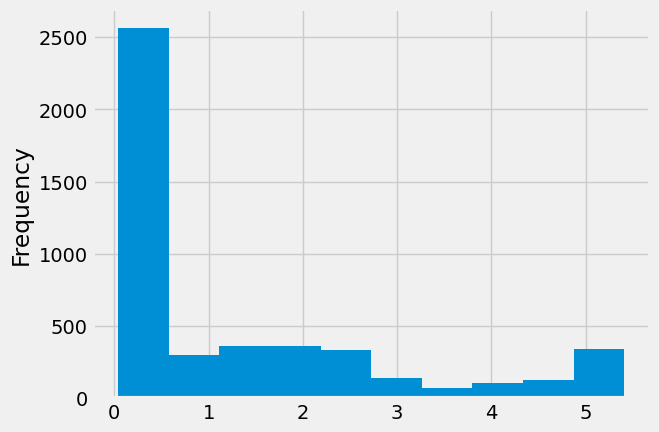

In [414]:
hist = timeSeriesData["ffEffectiveRate"].plot.hist()
# Most values for FFER are clustered between 0 and 0.5.

<AxesSubplot: xlabel='DATE'>

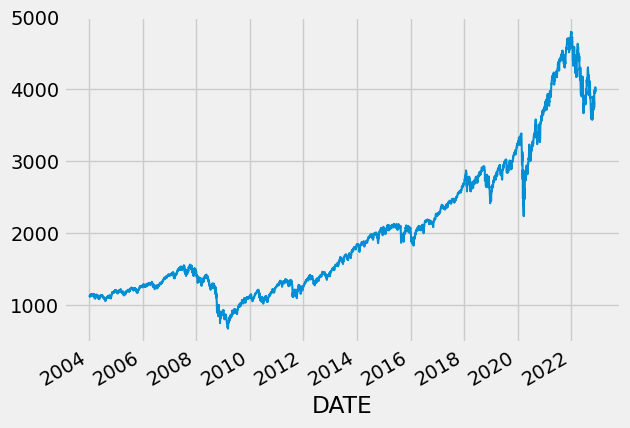

In [415]:
import matplotlib
timeSeriesData["SP500"].plot()

Text(0.5, 1.0, 'ffEffectiveRate & SP500')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'ffEffectiveRate')

Text(0, 0.5, 'SP500')

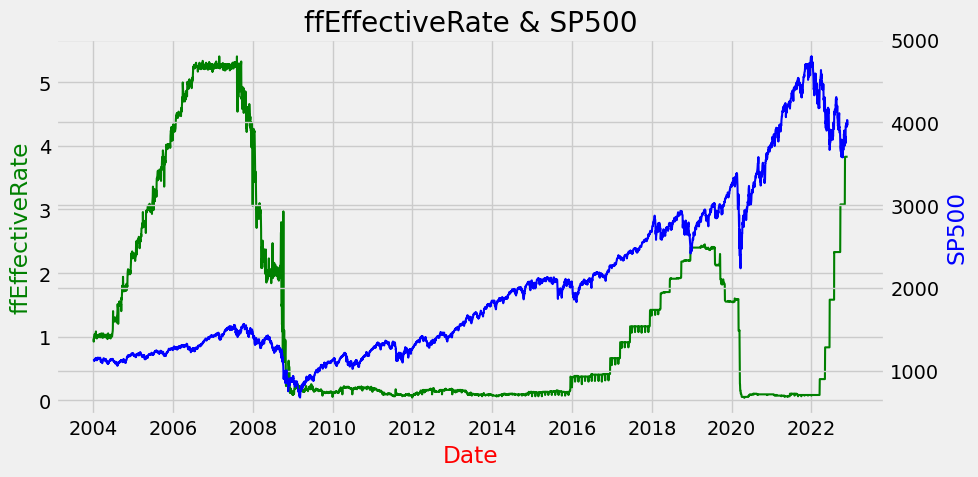

In [416]:
# Adding a Y-Axis Label to the Secondary Y-Axis in Matplotlib
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
 
# creating data for plot
# data arrangement between 0 and 50
# with the difference of 2
# x-axis
 
# y-axis values
y1 = timeSeriesData["ffEffectiveRate"]
 
# secondary y-axis values
y2 = timeSeriesData["SP500"]
 
# plotting figures by creating axes object
# using subplots() function
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('ffEffectiveRate & SP500')
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.plot(timeSeriesData.index, y1, color = 'g')
ax2.plot(timeSeriesData.index, y2, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('Date', color = 'r')
ax.set_ylabel('ffEffectiveRate', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('SP500', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()


# This graph is an overlay of the SP500 and the Fed Funds rate from 2004 to current (10/03/2022).
# This gives a reason to why the correlation is weak & negative (9 year period where the Funds Rate was 0 when SP500 was rallying).
# The Fed aggressively dropped rates in recessions.

In [417]:
import numpy
rng = numpy.random.RandomState( 28 )


# 2004 - 2016
# 2016 - 2020
# train = timeSeriesData.loc[timeSeriesData.index < '01-01-2016']
# test = timeSeriesData.loc[(timeSeriesData.index >= '01-01-2016') & (timeSeriesData.index <= '01-01-2020')]

# 2004 - 2011 train
# 2014 - 2020 test

timeSeriesData['lagFundsRate1'] = timeSeriesData['ffEffectiveRate'].shift(1)
timeSeriesData['lagFundsRate5'] = timeSeriesData['ffEffectiveRate'].shift(5)
timeSeriesData['lagFundsRate10'] = timeSeriesData['ffEffectiveRate'].shift(10)
timeSeriesData['lagFundsRate20'] = timeSeriesData['ffEffectiveRate'].shift(20)

timeSeriesData = timeSeriesData[20:]

timeSeriesData["date_time"] = timeSeriesData.index
# timeSeriesData[ 'year' ] = timeSeriesData.date_time.dt.year
timeSeriesData[ 'month' ] = timeSeriesData.date_time.dt.month
timeSeriesData[ 'dayofweek' ] = timeSeriesData.date_time.dt.dayofweek

# features = ['SP500', '5YBreakevenInflation', 'WTI','1YTreasuryConstantMaturity', 'month', 'dayofweek']
features = ['SP500', '5YBreakevenInflation', 'WTI','month', 'dayofweek','lagFundsRate1','lagFundsRate5','lagFundsRate10','lagFundsRate20']

# features = ['SP500', '5YBreakevenInflation', 'WTI','1YTreasuryConstantMaturity']
label = ['ffEffectiveRate']

# train = timeSeriesData.loc[timeSeriesData.index < '01-01-2011']
# test = timeSeriesData.loc[(timeSeriesData.index >= '01-01-2014') & (timeSeriesData.index <= '01-01-2020')]
train = timeSeriesData.loc[timeSeriesData.index < '01-01-2011']
test = timeSeriesData.loc[timeSeriesData.index >= '01-01-2014']
X_train = train[features]
y_train = train[label]
X_test = test[features]
y_test = test[label]

# https://medium.com/@Stan_DS/timeseries-split-with-sklearn-tips-8162c83612b9
# timeseries data, so have to use unusual training/test split method
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch






In [418]:
timeSeriesData[1:]

,ffEffectiveRate,SP500,5YBreakevenInflation,WTI,1YTreasuryConstantMaturity,lagFundsRate1,lagFundsRate5,lagFundsRate10,lagFundsRate20,date_time,month,dayofweek
DATE,,,,,,,,,,,,
2004-02-04,1.00,1126.520020,2.20,33.06,1.27,0.97,0.99,1.00,0.92,2004-02-04,2,2
2004-02-05,1.01,1128.589966,2.22,33.26,1.29,1.00,1.00,1.02,0.94,2004-02-05,2,3
2004-02-06,0.99,1142.760010,2.17,32.49,1.26,1.01,1.03,1.00,0.99,2004-02-06,2,4
2004-02-09,1.01,1139.810059,2.16,32.91,1.25,0.99,1.01,1.08,0.99,2004-02-09,2,0
2004-02-10,1.00,1145.540039,2.17,34.03,1.27,1.01,0.97,1.02,1.00,2004-02-10,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21,3.83,3949.939941,2.34,79.74,4.75,3.83,3.83,3.83,3.08,2022-11-21,11,0
2022-11-22,3.83,4003.580078,2.35,80.83,4.79,3.83,3.83,3.83,3.08,2022-11-22,11,1
2022-11-23,3.83,4027.260010,2.33,77.93,4.75,3.83,3.83,3.83,3.08,2022-11-23,11,2


In [419]:
# timeSeriesData.columns
# timeSeriesData[ 'month' ]

In [420]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures


lstNum1 = ['SP500', '5YBreakevenInflation', 'WTI','lagFundsRate1','lagFundsRate5','lagFundsRate10','lagFundsRate20']

lstCat1 = ['month', 'dayofweek']

pipeNum1 = Pipeline( [
("selector", ColumnTransformer([ ("selector", "passthrough", lstNum1 ) ] )),
# ('spline', SplineTransformer( degree=3, n_knots=5 ) ),
('poly', PolynomialFeatures( degree=3) ),
('scaler', StandardScaler() )
])

pipeCat1 = Pipeline([
('selector', ColumnTransformer([ ("selector", "passthrough", lstCat1 ) ] )),
('encoder', OneHotEncoder( dtype=int, drop="first",handle_unknown='ignore'))
])

preprocessor1 = FeatureUnion([
('num', pipeNum1 ),
('cat', pipeCat1 )

])


In [421]:
from sklearn.ensemble import AdaBoostRegressor
import numpy as np

pipeGb1 = Pipeline([
('preprocessor', preprocessor1 ),
('model', AdaBoostRegressor() )
] )

pipeGb1.fit( X_train, np.ravel(y_train) )

Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['SP500',
                                                                                                    '5YBreakevenInflation',
                                                                                                    'WTI',
                                                                                                    'lagFundsRate1',
                                                                                                    'lagFundsRate5',
                                                                                                    'lagFundsRate10',
                                                                                                    'lagFundsRate20'])])),
                                                                 ('poly',
                                                                  PolynomialFeatures(degree=3)),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['month',
                                                                                                    'dayofweek'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                handle_unknown='ignore'))]))])),
                ('model', AdaBoostRegressor())])

In [422]:
import sklearn
predTrainGb5 = pipeGb1.predict( X_train )
predTestGb5 = pipeGb1.predict( X_test )
sklearn.metrics.r2_score( y_train, predTrainGb5 )
sklearn.metrics.r2_score( y_test, predTestGb5 )

# 2004-2016 train, 2016-2020 test: 98% train, 66% test all variables

# # 2004 - 2011 train, 2014 - 2020 test: 98% train 60% test all variables

0.9884074613978652

0.865243696596962

/tmp/ipykernel_7589/2057056480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = pipeGb1.predict(X_test)


<AxesSubplot: xlabel='DATE'>

Text(0.5, 1.0, 'Raw Data and Prediction')

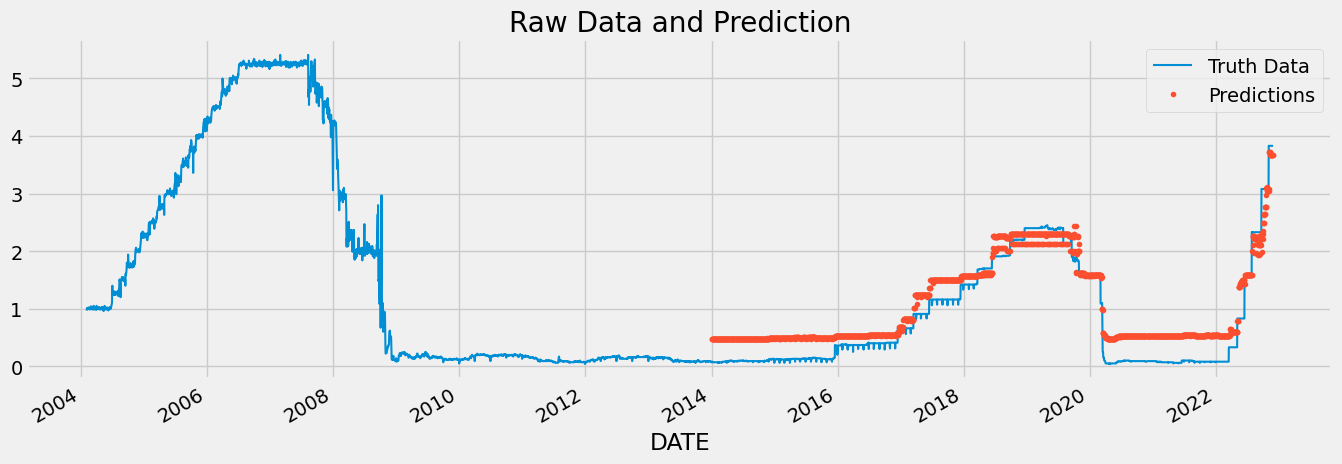

In [423]:

test['prediction'] = pipeGb1.predict(X_test)
timeSeriesData = timeSeriesData.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = timeSeriesData[['ffEffectiveRate']].plot(figsize=(15, 5))
timeSeriesData['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [424]:
# fi = pd.DataFrame(data=pipeGb1.steps[1][1].feature_importances_,
#              index=pipeGb1.steps[1][1].get_feature_names_out(),
#              columns=['importance'])
# fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
# plt.show()

In [425]:
# import numpy
# dfComponents = pd.DataFrame( numpy.transpose( pipeGb1[ 'model' ].components_ ) )
# dfComponents.index = pipeGb1['preprocessor'].get_feature_names_out()
# plot = dfComponents.plot.barh()

In [426]:
import xgboost as xgb
pipeXG = Pipeline([
('preprocessor', preprocessor1 ),
('model', xgb.XGBRegressor() )
], verbose=True )


In [427]:
pipeXG.fit( X_train, y_train )

predTrainXG = pipeGb1.predict( X_train )
predTestXG = pipeGb1.predict( X_test )
sklearn.metrics.r2_score( y_train, predTrainXG )
sklearn.metrics.r2_score( y_test, predTestXG )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.8s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['SP500',
                                                                                                    '5YBreakevenInflation',
                                                                                                    'WTI',
                                                                                                    'lagFundsRate1',
                                                                                                    'lagFundsRate5',
                                                                                                    'lagFundsRate10',
                                                                                                    'lagFundsRate20'])])),
                                                                 ('poly',
                                                                  PolynomialFeatures(degree=3)),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 Pipeline(...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))],
         verbose=True)

0.9884074613978652

0.865243696596962

<AxesSubplot: xlabel='DATE'>

Text(0.5, 1.0, 'Raw Data and Prediction2')

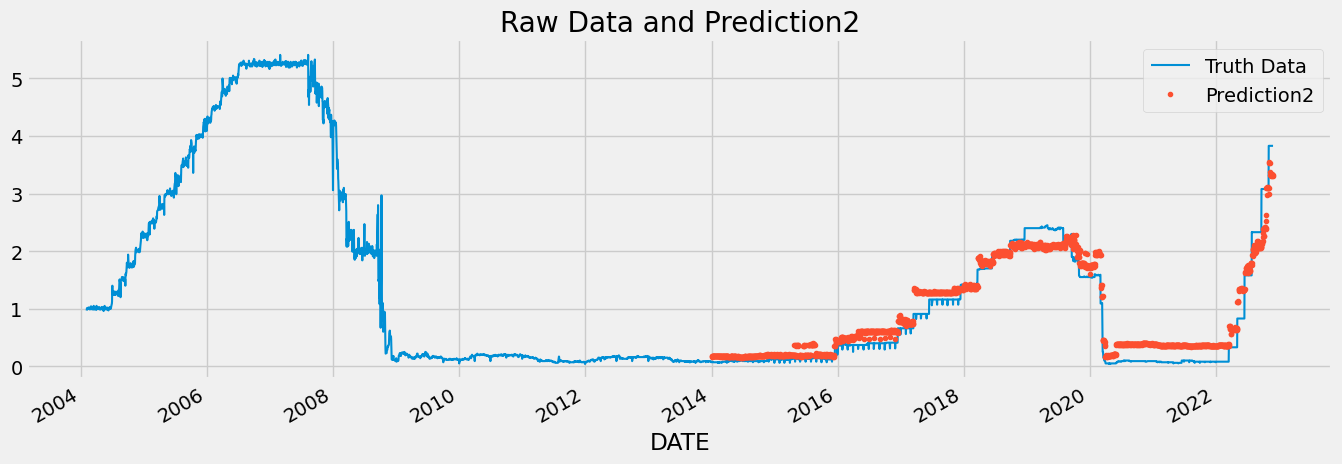

In [428]:

test['prediction2'] = pipeXG.predict(X_test)
timeSeriesData = timeSeriesData.merge(test[['prediction2']], how='left', left_index=True, right_index=True)
ax = timeSeriesData[['ffEffectiveRate']].plot(figsize=(15, 5))
timeSeriesData['prediction2'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Prediction2'])
ax.set_title('Raw Data and Prediction2')
plt.show()

In [429]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

pipeNn = Pipeline([
('preprocessor', preprocessor1 ),
('model', MLPRegressor( random_state=28,  max_iter = 999999, hidden_layer_sizes=(20,20,20), learning_rate_init = 0.0005) )
], verbose=True )

paramGridNn = {
'model__activation': ['identity', 'logistic', 'tanh', 'relu'],
"model__solver": ["lbfgs", "sgd", "adam"],
"model__alpha": [5,7,10,15]
}

gridNn = GridSearchCV( pipeNn, paramGridNn, cv=5, n_jobs=-1 )


In [430]:
gridNn.fit( X_train, np.ravel(y_train) )
predTrainNn = gridNn.predict( X_train )
predTestNn = gridNn.predict( X_test )
sklearn.metrics.r2_score( y_train, predTrainNn )
sklearn.metrics.r2_score( y_test, predTestNn )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   8.6s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        FeatureUnion(transformer_list=[('num',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnTransformer(transformers=[('selector',
                                                                                                                          'passthrough',
                                                                                                                          ['SP500',
                                                                                                                           '5YBreakevenInflation',
                                                                                                                           'WTI',
                                                                                                                           'lagFundsRate1',
                                                                                                                           'lagFundsRate5',
                                                                                                                           'lagFundsRate10',
                                                                                                                           'lagFundsRate20'])])),
                                                                                        ('poly',
                                                                                         PolynomialFeatures(degree=3)),
                                                                                        ('scaler',
                                                                                         StandardS...
                                                                                         OneHotEncoder(drop='first',
                                                                                                       dtype=<class 'int'>,
                                                                                                       handle_unknown='ignore'))]))])),
                                       ('model',
                                        MLPRegressor(hidden_layer_sizes=(20, 20,
                                                                         20),
                                                     learning_rate_init=0.0005,
                                                     max_iter=999999,
                                                     random_state=28))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'model__activation': ['identity', 'logistic', 'tanh',
                                               'relu'],
                         'model__alpha': [5, 7, 10, 15],
                         'model__solver': ['lbfgs', 'sgd', 'adam']})

0.9975068183078121

-7.369718798450281

In [431]:
gridNn.best_params_
gridNn.best_score_

{'model__activation': 'identity', 'model__alpha': 7, 'model__solver': 'lbfgs'}

0.6067472056008516

<AxesSubplot: xlabel='DATE'>

Text(0.5, 1.0, 'Raw Data and Prediction3')

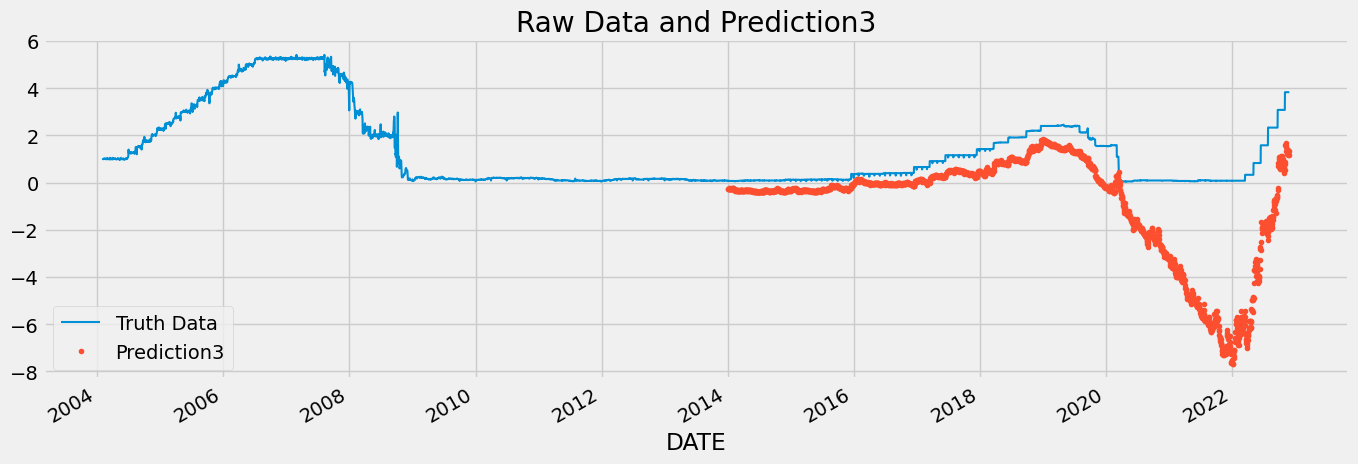

In [432]:

test['prediction3'] = gridNn.predict(X_test)
timeSeriesData3 = timeSeriesData.merge(test[['prediction3']], how='left', left_index=True, right_index=True)
ax = timeSeriesData3[['ffEffectiveRate']].plot(figsize=(15, 5))
timeSeriesData3['prediction3'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Prediction3'])
ax.set_title('Raw Data and Prediction3')
plt.show()

In [433]:
# 0.9942075199861057
# 0.9079779861928471
# max_iter = 5000, hidden_layer_sizes=(20,20,20), alpha=10, learning_rate_init=0.0005

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

pipeNn = Pipeline([
('preprocessor', preprocessor1 ),
# ('model', MLPRegressor( random_state=28, early_stopping=True,  max_iter = 99999999, hidden_layer_sizes=(500,500,500,500,500)) )
('model', MLPRegressor( random_state=28, early_stopping=True, max_iter = 5000, hidden_layer_sizes=(20,20,20), alpha=10, learning_rate_init=0.0005) )
], verbose=True )


In [434]:
pipeNn.fit( X_train, np.ravel(y_train) )
predTrainNnBase = pipeNn.predict( X_train )
predTestNnBase = pipeNn.predict( X_test )
sklearn.metrics.r2_score( y_train, predTrainNnBase )
sklearn.metrics.r2_score( y_test, predTestNnBase )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   9.1s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['SP500',
                                                                                                    '5YBreakevenInflation',
                                                                                                    'WTI',
                                                                                                    'lagFundsRate1',
                                                                                                    'lagFundsRate5',
                                                                                                    'lagFundsRate10',
                                                                                                    'lagFundsRate20'])])),
                                                                 ('poly',
                                                                  PolynomialFeatures(degree=3)),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['month',
                                                                                                    'dayofweek'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                handle_unknown='ignore'))]))])),
                ('model',
                 MLPRegressor(alpha=10, early_stopping=True,
                              hidden_layer_sizes=(20, 20, 20),
                              learning_rate_init=0.0005, max_iter=5000,
                              random_state=28))],
         verbose=True)

0.9941337754643844

0.9150514444666084

<AxesSubplot: xlabel='DATE'>

Text(0.5, 1.0, 'Raw Data and Prediction4')

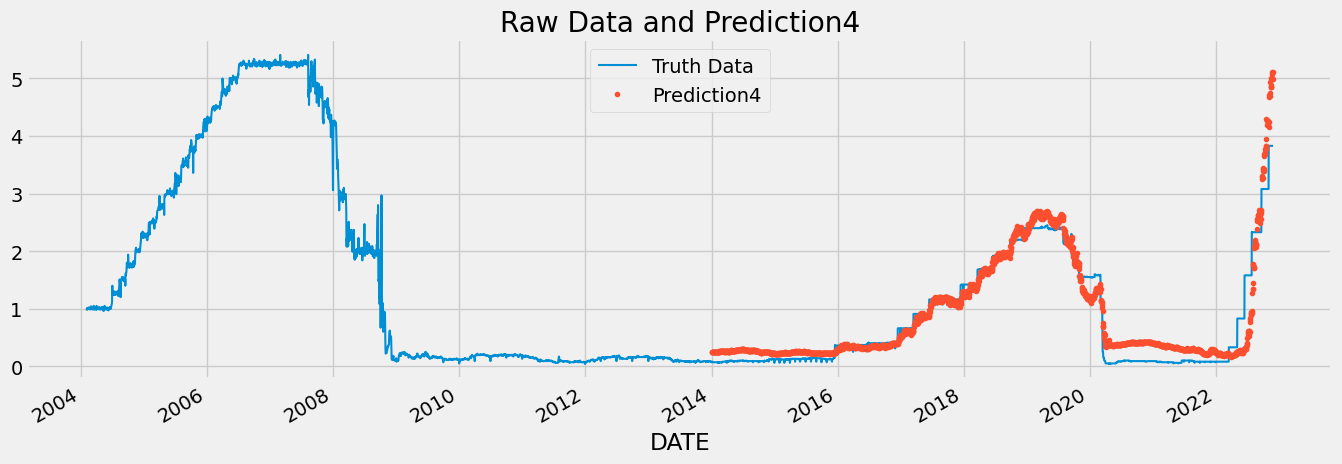

In [435]:

test['prediction4'] = pipeNn.predict(X_test)
timeSeriesData4 = timeSeriesData3.merge(test[['prediction4']], how='left', left_index=True, right_index=True)
ax = timeSeriesData4[['ffEffectiveRate']].plot(figsize=(15, 5))
timeSeriesData4['prediction4'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Prediction4'])
ax.set_title('Raw Data and Prediction4')
plt.show()

In [436]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings


In [437]:
# forecaster = ForecasterAutoreg(
#                 regressor = RandomForestRegressor(random_state=123),
#                 lags      = 6
#              )

# forecaster.fit(y=data_train['y'])
# forecaster